# 암환자 유전체 데이터 기반 암종 분류 AI 모델 개발
* Predict SUBCLASS

# Import library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import xgboost as xgb

# Load Data

In [2]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [8]:
train.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [9]:
train.shape

(6201, 4386)

# Data Preprocessing

In [12]:
# SUBCLASS 가 범주형이기 때문에 LabelEncoder 사용
le_subclass = LabelEncoder()
train['SUBCLASS'] = le_subclass.fit_transform(train['SUBCLASS'])

# 변환된 레이블 확인
for i, label in enumerate(le_subclass.classes_):
    print(f"원래 레이블: {label}, 변환된 숫자: {i}")

원래 레이블: ACC, 변환된 숫자: 0
원래 레이블: BLCA, 변환된 숫자: 1
원래 레이블: BRCA, 변환된 숫자: 2
원래 레이블: CESC, 변환된 숫자: 3
원래 레이블: COAD, 변환된 숫자: 4
원래 레이블: DLBC, 변환된 숫자: 5
원래 레이블: GBMLGG, 변환된 숫자: 6
원래 레이블: HNSC, 변환된 숫자: 7
원래 레이블: KIPAN, 변환된 숫자: 8
원래 레이블: KIRC, 변환된 숫자: 9
원래 레이블: LAML, 변환된 숫자: 10
원래 레이블: LGG, 변환된 숫자: 11
원래 레이블: LIHC, 변환된 숫자: 12
원래 레이블: LUAD, 변환된 숫자: 13
원래 레이블: LUSC, 변환된 숫자: 14
원래 레이블: OV, 변환된 숫자: 15
원래 레이블: PAAD, 변환된 숫자: 16
원래 레이블: PCPG, 변환된 숫자: 17
원래 레이블: PRAD, 변환된 숫자: 18
원래 레이블: SARC, 변환된 숫자: 19
원래 레이블: SKCM, 변환된 숫자: 20
원래 레이블: STES, 변환된 숫자: 21
원래 레이블: TGCT, 변환된 숫자: 22
원래 레이블: THCA, 변환된 숫자: 23
원래 레이블: THYM, 변환된 숫자: 24
원래 레이블: UCEC, 변환된 숫자: 25


In [13]:
train

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,8,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,19,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,20,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,9,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,6,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,13,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,11,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,4,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,22,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [21]:
train['SUBCLASS'].value_counts()

SUBCLASS
2     786
8     515
6     461
21    379
9     334
23    324
20    276
18    266
15    253
11    229
7     223
4     223
19    198
25    198
13    184
14    178
10    158
12    158
3     155
17    147
22    124
16    120
1     104
24     98
0      72
5      38
Name: count, dtype: int64

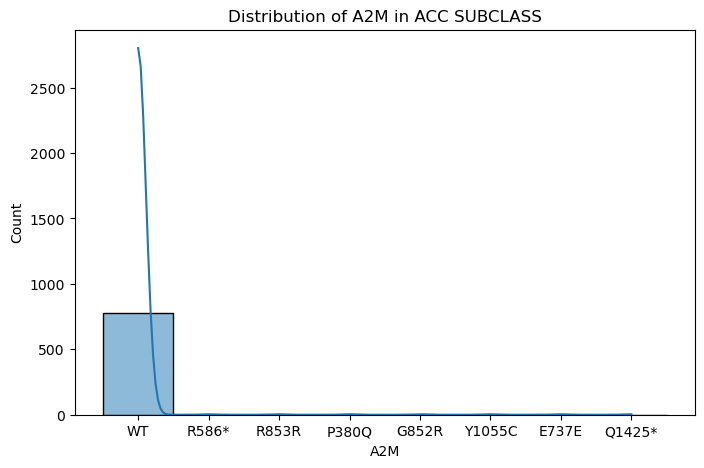

In [27]:
# 예시로 'A2M' 유전자에 대한 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train[train['SUBCLASS'] == 2]['A2M'], kde=True)
plt.title('Distribution of A2M in ACC SUBCLASS')
plt.show()


In [26]:
train['A2M'].value_counts()

A2M
WT                    6053
R174H                    2
E737E                    2
I984S                    2
P1306Q                   2
                      ... 
V1255V V814V V551M       1
C1321Y I848I P529H       1
V206V                    1
V207L                    1
S150S                    1
Name: count, Length: 141, dtype: int64

In [47]:
train[train['A2M'] == 'V1255V V814V V551M']

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
1789,TRAIN_1789,16,V1255V V814V V551M,D223N,WT,WT,M4R D89D,D2232D T2212A R672W,G2339D R2311W R2192R L1528L A850T R696H R444W,I1530I H1247Y I733I A427V,...,K1660K N1799S S2418S,R387C T17I,T282T,C293C,S1451N,A66V R346H,WT,N543T,A228D E161E,E110* E112E Y437Y


In [54]:
## x 의 경우도 범주형으로 구성되어 있어, 알맞은 인코딩 필요
X = train.drop(columns=['SUBCLASS', 'ID'])
y_subclass = train['SUBCLASS']

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [62]:
mutation_columns = list(X.columns)

In [64]:

# 최종적으로 모든 인코딩된 데이터프레임을 저장할 리스트
encoded_dfs = []

# 각 mutation 컬럼에 대해 반복
for col in mutation_columns:
    # Mutation 데이터를 리스트로 변환
    X[col + '_split'] = X[col].apply(lambda x: x.split() if isinstance(x, str) and x != 'WT' else ['WT'])
    
    # MultiLabelBinarizer 적용
    mlb = MultiLabelBinarizer()
    encoded = mlb.fit_transform(X[col + '_split'])
    
    # 인코딩된 결과를 데이터프레임으로 변환
    df_encoded = pd.DataFrame(encoded, columns=mlb.classes_, index=X.index)
    
    # 인코딩된 데이터프레임을 리스트에 추가
    encoded_dfs.append(df_encoded)

# 모든 인코딩된 데이터프레임을 결합
final_encoded_df = pd.concat(encoded_dfs, axis=1)

# 결과 출력 (변환된 데이터의 shape 확인)
print(final_encoded_df.shape)
print(final_encoded_df.head())

In [51]:
pd.DataFrame(mlb.fit_transform(pd.DataFrame(X['A2M'].apply(lambda x: x.split() if x != 'WT' else ['WT']))), columns=mlb.classes_, index=X.index)


AttributeError: 'DataFrame' object has no attribute '_validate_params'

# Model Define and Train

In [31]:
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss' 
)


In [32]:
model.fit(X_encoded, y_subclass)

/opt/miniconda3/envs/lsrr/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:31:08] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# Inference

In [33]:
test_X = test.drop(columns=['ID'])
X_encoded = test_X.copy()
X_encoded[categorical_columns] = ordinal_encoder.transform(test_X[categorical_columns])

In [34]:
predictions = model.predict(X_encoded)

In [35]:
original_labels = le_subclass.inverse_transform(predictions)

# Submisson

In [36]:
submisson = pd.read_csv("./data/sample_submission.csv")

In [37]:
submisson["SUBCLASS"] = original_labels

In [38]:
from datetime import datetime
today = datetime.now()
mmdd = today.strftime("%m%d")

In [39]:
submisson.to_csv(f'./submit/{mmdd}_baseline_submission.csv', encoding='UTF-8-sig', index=False)